In [1]:
# Fashion-MNIST solution - import packages
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision as tv
import matplotlib.pyplot as plt

In [48]:
# Create dataloaders for Fashion-MNIST dataset
train_dataset = tv.datasets.FashionMNIST(root='./data', train=True, download=True, transform=tv.transforms.ToTensor())
test_dataset = tv.datasets.FashionMNIST(root='./data', train=False, download=True, transform=tv.transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

torch.Size([1, 28, 28])
Shirt


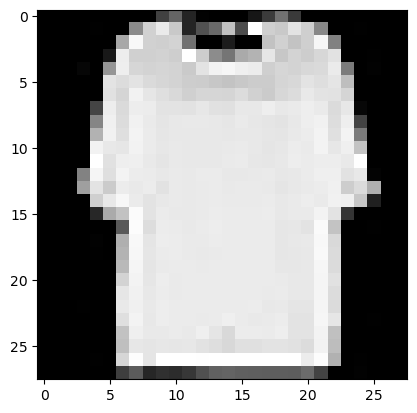

In [50]:
# Look at dimensions of data
for X,T in train_loader: # datapoints and targets
    print(X[0].shape) # First image, first channel, all rows, all columns
    plt.imshow(X[0,0,:,:].numpy(), cmap='gray') # Plot first image
    break
#print name of class
print(train_dataset.classes[T[0]])

In [51]:
# Build the neural network model, which will learn to classify images based on labels

class FashionNet(torch.nn.Module):
    def __init__(self):
        super().__init__() # Call the initialisation method of the neural network module
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=4, padding=0)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=72, kernel_size=4, padding=0)
        self.conv3 = nn.Conv2d(in_channels=72, out_channels=64, kernel_size=4, padding=0)
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=32, kernel_size=4, padding=0)
        self.fc = nn.Linear(in_features=3*3*32, out_features=10) 

    def forward(self,x):
        x = self.conv1(x) # Apply first convolutional layer
        # print(x.shape)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.conv2(x)
        # print(x.shape)
        x = F.relu(x)
        x = self.conv3(x)
        # print(x.shape)
        x = F.relu(x)
        x = self.conv4(x)
        # print(x.shape)
        x = F.relu(x)
        x = x.reshape(-1,3*3*32) # Flatten
        x = self.fc(x)
        # print(x.shape)
        return x

In [67]:
# Instantiate
fashion_net = FashionNet()
fashion_net.forward(X[0:1,:,:,:]) # Forward pass

tensor([[-0.0460,  0.0166, -0.0475,  0.0732,  0.0197,  0.0027, -0.0175,  0.0070,
          0.0143, -0.0440]], grad_fn=<AddmmBackward0>)

In [68]:
# Define loss function and optimiser
loss_function = nn.CrossEntropyLoss()
optimiser = optim.Adam(fashion_net.parameters(), lr=0.0005) # momentum estimation

In [69]:
from tqdm import tqdm # tqdm is a progress bar library
losses = [] # Create a list to store the losses
for epoch in range(10): # Loop over the epochs
  for X, T in tqdm(train_loader): # Loop over the training data
    optimiser.zero_grad() # Zero out the gradients so we don't accumulate them
    logits = fashion_net(X) # Pass the input through the model to get the logits
    loss = loss_function(logits, T) # Calculate the loss
    loss.backward() # Backpropagate the loss
    optimiser.step() # Update the weights
    losses.append(loss.item()) # Append the loss to the list of losses
  # print avg loss over the epoch
  print(f'Epoch {epoch+1}, loss: {np.mean(losses[-len(train_dataset)//32:]):.4f}')

100%|██████████| 1875/1875 [00:41<00:00, 45.41it/s]


Epoch 1, loss: 0.5650


100%|██████████| 1875/1875 [00:43<00:00, 42.77it/s]


Epoch 2, loss: 0.3583


100%|██████████| 1875/1875 [00:45<00:00, 41.34it/s]


Epoch 3, loss: 0.3038


100%|██████████| 1875/1875 [00:45<00:00, 41.63it/s]


Epoch 4, loss: 0.2705


100%|██████████| 1875/1875 [00:45<00:00, 41.06it/s]


Epoch 5, loss: 0.2457


100%|██████████| 1875/1875 [00:47<00:00, 39.64it/s]


Epoch 6, loss: 0.2261


100%|██████████| 1875/1875 [00:47<00:00, 39.60it/s]


Epoch 7, loss: 0.2089


100%|██████████| 1875/1875 [00:46<00:00, 39.97it/s]


Epoch 8, loss: 0.1930


100%|██████████| 1875/1875 [00:46<00:00, 39.97it/s]


Epoch 9, loss: 0.1767


100%|██████████| 1875/1875 [00:47<00:00, 39.76it/s]

Epoch 10, loss: 0.1648


tensor(0.9127)


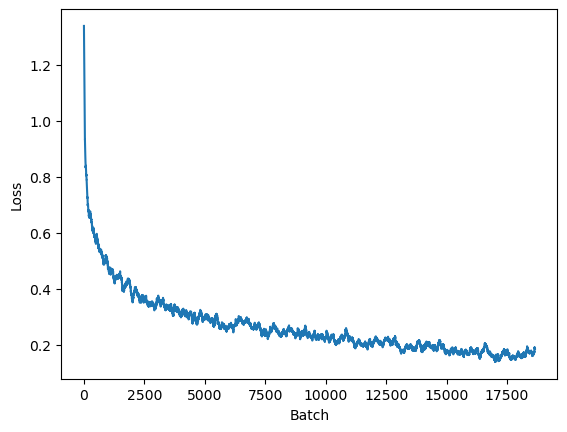

In [70]:
# Plot a running average of the loss 
plt.plot(np.convolve(losses, np.ones(100)/100, mode='valid')) # average over the last 100 batches/timesteps
plt.xlabel('Batch')
plt.ylabel('Loss')

def test_accuracy(fashion_net,test_loader):
    correct = 0
    total = 0

    for X,T in test_loader:
        logits = fashion_net(X) # Pass the input through the model to get the logits
        predicted = torch.argmax(logits, dim=1) # Get the predicted class
        correct += (predicted == T).sum()
        total += len(T)
    return correct/total

# Print test accuracy
print(test_accuracy(fashion_net, test_loader))